# 06_ Analysis of Applications Train and Test Datasets
- In this notebook I analyze and summarize the application_train and application_test datasets' continuous or float64types. The datasets have three types: float64, int64, and object.The int64 and object types are analyzed in a different notebook.

- To more efficiently analyze both datasets I combined them into one dataframe and added a filter to later separate them.The application_trainand application_test datasets includes all the same fields except the target variable.

- The main objective in this notebook is to gain an understanding of the datasets using descriptive statistics and data visualizations. After reviewing these statistics and data visualizations I will decide which fields should be included as features. I also perform transformations on fields as deemed necessary.

**Analysis Summary**:
- Fields with missing rate higher than 10% were removed with some exceptions.
- Fields with missing rate less than 10% were filled with the median.
- Highly correlated fields were removed.
- Some fields were transformed to increase normality.
- Some fields were converted to categorical features.
- After analyzing the 70 continuous fields 20 (including derived features) were selected as features.

In [1]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

## 6.1 Import data and overview data

In [2]:
df = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\application_train.csv")
test_df = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\application_test.csv")
FieldsNames = pd.read_csv(r"C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\HomeCredit_columns_description.csv")

In [3]:
# combine 2 tables df and test_df
df = df.append(test_df)

In [4]:
df.shape

(356255, 122)

In [5]:
df.dtypes.value_counts()

float64    66
int64      40
object     16
dtype: int64

In [6]:
float_col = df.select_dtypes(['float']).columns

In [7]:
df[float_col].describe().T

count           mean            std      min  \
TARGET                      307511.0       0.080729       0.272419      0.0   
AMT_INCOME_TOTAL            356255.0  170116.059860  223506.819009  25650.0   
AMT_CREDIT                  356255.0  587767.413753  398623.693715  45000.0   
AMT_ANNUITY                 356219.0   27425.560657   14732.808190   1615.5   
AMT_GOODS_PRICE             355977.0  528019.997800  366064.985655  40500.0   
...                              ...            ...            ...      ...   
AMT_REQ_CREDIT_BUREAU_DAY   308687.0       0.006281       0.104250      0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  308687.0       0.029995       0.191374      0.0   
AMT_REQ_CREDIT_BUREAU_MON   308687.0       0.231697       0.855949      0.0   
AMT_REQ_CREDIT_BUREAU_QRT   308687.0       0.304399       0.786915      0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  308687.0       1.911564       1.865338      0.0   

                                 25%       50%       75%          max  
TARGET                           0.0       0.0       0.0          1.0  
AMT_INCOME_TOTAL            112500.0  153000.0  202500.0  117000000.0  
AMT_CREDIT                  270000.0  500211.0  797557.5    4050000.0  
AMT_ANNUITY                  16731.0   25078.5   34960.5     258025.5  
AMT_GOODS_PRICE             234000.0  450000.0  675000.0    4050000.0  
...                              ...       ...       ...          ...  
AMT_REQ_CREDIT_BUREAU_DAY        0.0       0.0       0.0          9.0  
AMT_REQ_CREDIT_BUREAU_WEEK       0.0       0.0       0.0          8.0  
AMT_REQ_CREDIT_BUREAU_MON        0.0       0.0       0.0         27.0  
AMT_REQ_CREDIT_BUREAU_QRT        0.0       0.0       0.0        261.0  
AMT_REQ_CREDIT_BUREAU_YEAR       0.0       1.0       3.0         25.0  

[66 rows x 8 columns]

## 6.2 Analyze Missing Values
- I use a correlation heatmap to measures nullity correlation or how strongly the presence or absence of one variable affects the presence of another.
- Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

**Observations**:
- The housings fields have high nullity correlation with each other.
- Credit bureau fields are perfectly nullity correlated with each other.
- Social circle fields are perfectly nullity correlated with each other.
- Credit bureau fields have high nullity correlation with the EXT_SOURCE_3 field.

**Conclusion**:
- Remove any fields that have missing values percentage higher than 10% with exception of the EXT_SOURCE_1 and EXT_SOURCE_3. The EXT_SOURCE_1 and EXT_SOURCE_3 are domain knowledge fields.
- Fill the fields with a missing percentange less than 10% with median value from the TRAINING set after removing any outliers.
- I will fill in the missing values for the EXT_SOURCE_1 and EXT_SOURCE_3 fields using prediction.

In [8]:
float_table = df[float_col]
# get fields that have missing data over 10% 
drop_columns = []
for i in range(len(float_table.isnull().mean())):
    if float_table.isnull().mean()[i] > 0.1:
        drop_columns.append(float_table.isnull().mean().index.values.tolist()[i])

#drop columns with over 10% missing data
float_table_filter = float_table.drop(columns=drop_columns, axis=1)

In [9]:
# adding back EXT_SOURCE_1 and EXT_SOURCE_3
float_table_filter['EXT_SOURCE_1'] = float_table['EXT_SOURCE_1']
float_table_filter['EXT_SOURCE_3'] = float_table['EXT_SOURCE_3']
float_table_filter

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0              202500.0    406597.5      24700.5         351000.0   
1              270000.0   1293502.5      35698.5        1129500.0   
2               67500.0    135000.0       6750.0         135000.0   
3              135000.0    312682.5      29686.5         297000.0   
4              121500.0    513000.0      21865.5         513000.0   
...                 ...         ...          ...              ...   
48739          121500.0    412560.0      17473.5         270000.0   
48740          157500.0    622413.0      31909.5         495000.0   
48741          202500.0    315000.0      33205.5         315000.0   
48742          225000.0    450000.0      25128.0         450000.0   
48743          135000.0    312768.0      24709.5         270000.0   

       REGION_POPULATION_RELATIVE  DAYS_REGISTRATION  CNT_FAM_MEMBERS  \
0                        0.018801            -3648.0              1.0   
1                        0.003541            -1186.0              2.0   
2                        0.010032            -4260.0              1.0   
3                        0.008019            -9833.0              2.0   
4                        0.028663            -4311.0              1.0   
...                           ...                ...              ...   
48739                    0.002042            -9094.0              1.0   
48740                    0.035792            -3015.0              4.0   
48741                    0.026392            -2681.0              3.0   
48742                    0.018850            -1461.0              2.0   
48743                    0.006629            -1072.0              2.0   

       EXT_SOURCE_2  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0          0.262949                       2.0                       2.0   
1          0.622246                       1.0                       0.0   
2          0.555912                       0.0                       0.0   
3          0.650442                       2.0                       0.0   
4          0.322738                       0.0                       0.0   
...             ...                       ...                       ...   
48739      0.648575                       1.0                       0.0   
48740      0.684596                       2.0                       0.0   
48741      0.632770                       0.0                       0.0   
48742      0.445701                       0.0                       0.0   
48743      0.456541                       0.0                       0.0   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                           2.0                       2.0   
1                           1.0                       0.0   
2                           0.0                       0.0   
3                           2.0                       0.0   
4                           0.0                       0.0   
...                         ...                       ...   
48739                       1.0                       0.0   
48740                       2.0                       0.0   
48741                       0.0                       0.0   
48742                       0.0                       0.0   
48743                       0.0                       0.0   

       DAYS_LAST_PHONE_CHANGE  EXT_SOURCE_1  EXT_SOURCE_3  
0                     -1134.0      0.083037      0.139376  
1                      -828.0      0.311267           NaN  
2                      -815.0           NaN      0.729567  
3                      -617.0           NaN           NaN  
4                     -1106.0           NaN           NaN  
...                       ...           ...           ...  
48739                  -684.0           NaN      0.643026  
48740                     0.0           NaN           NaN  
48741                  -838.0      0.733503      0.283712  
48742                 -2308.0      0.373090      0.595456  
48743  

In [10]:
# print description of each field in the table
Info = FieldsNames[FieldsNames['Table'] == 'application_{train|test}.csv'][['Row','Description']]

for i in float_table_filter.columns:
    for j in Info.values.tolist():
       if i == j[0]:
           print(i,":",j[1],"\n","-"*100)

AMT_INCOME_TOTAL : Income of the client 
 ----------------------------------------------------------------------------------------------------
AMT_CREDIT : Credit amount of the loan 
 ----------------------------------------------------------------------------------------------------
AMT_ANNUITY : Loan annuity 
 ----------------------------------------------------------------------------------------------------
AMT_GOODS_PRICE : For consumer loans it is the price of the goods for which the loan is given 
 ----------------------------------------------------------------------------------------------------
REGION_POPULATION_RELATIVE : Normalized population of region where client lives (higher number means the client lives in more populated region) 
 ----------------------------------------------------------------------------------------------------
DAYS_REGISTRATION : How many days before the application did client change his registration 
 -----------------------------------------------

## 6.4 Add Domain Knowledge Features
- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due)
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age

In [11]:
df['CREDIT_INCOME_PERCENT'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df['ANNUITY_INCOME_PERCENT'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df['CREDIT_TERM'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'].apply(lambda x: 0 if x==365243.00 else x) / df['DAYS_BIRTH']
domain_fields = ['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']

## 6.5 Prepare Correlation Heatmap
To visualize any correlations between our feature fields

**Observations**:
- The fields AMT_GOODS_PRICE and AMT_CREDIT are perfectly correlated.
- The fields AMT_GOODS_PRICE has a high correlation with AMT_ANNUITY.
- The fields AMT_ANNUITY and AMT_CREDIT have a high correlation.
- The fields OBS_30_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE are perfectly correlated.
- The fields DEF_30_CNT_SOCIAL_CIRCLE and DEF_60_CNT_SOCIAL_CIRCLE have a high correlation.

**Conclusion**:
- Remove AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE and DEF_30_CNT_SOCIAL_CIRCLE as featuare fields since these fields are highly correlated with another and will provide minimal value to our model.

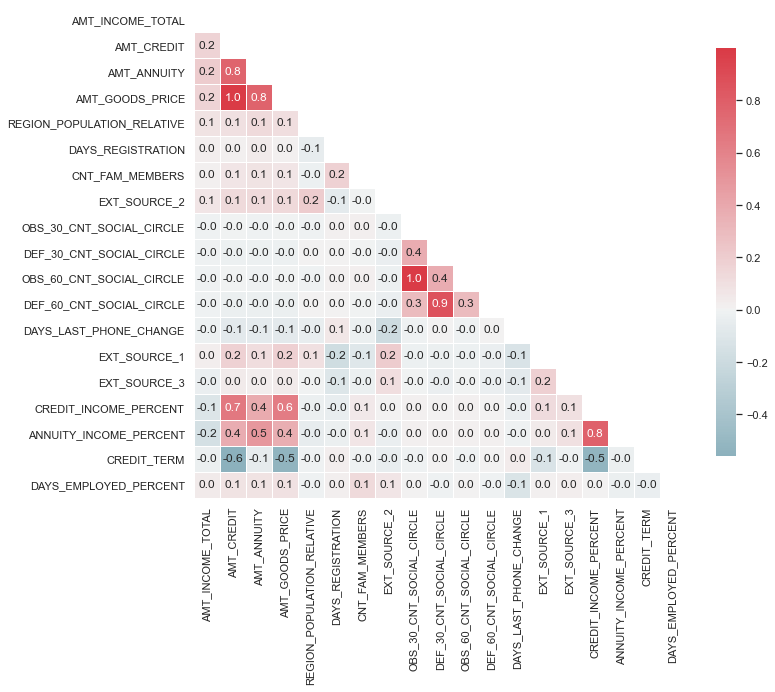

In [12]:
sns.set(style="white")

# Compute the correlation matrix
corr_fields = float_table_filter.columns.values.tolist() + domain_fields
corr = df[corr_fields].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, annot=True,  linewidths=.5, cbar_kws={"shrink": .5},fmt='.1f'   )

plt.show()

## 6.6 Exclude Highly Correlated Features

In [13]:
#fields we want to exclude
excluded = ['AMT_GOODS_PRICE','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE']

adjusted_float_list = np.setdiff1d(float_table_filter.columns,excluded,assume_unique=True)

float_table_adjusted = float_table_filter[adjusted_float_list]
# float_table_adjusted.describe().T

 ## 6.7 Prepare Histograms
 To visualize the distribution of our feature fields. But only create the histograms on the training dataset

**Observations**:
- Most fields have outliers and are not normally distributed.
- Some fields such as AMT_INCOME_TOTAL, AMT_CREDIT and AMT_ANNUITY as are rigthly skewed.
- The fields CNT_FAM_MEMBERS,DEF_60_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE can probably be converted into categorical fields since they have few unique values.

**Conclusion**:
- We can apply log and boxcox transformations to some of the fields to reduce skewness and get some more normality from the distribution of the data.
- On some fields remove outliers using Tukey's Method. With Tukey's method we use an outlier step normaly calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal and will be removed from the training dataset.
- Convert the fields CNT_FAM_MEMBERS,DEF_60_CNT_SOCIAL_CIRCLE and OBS_60_CNT_SOCIAL_CIRCLE to categorical fields.

In [14]:
float_filter = float_table_adjusted.columns.values.tolist() + domain_fields + ['SK_ID_CURR','TARGET']

In [15]:
df = df[float_filter] 

In [16]:
train = df[df.TARGET.isnull() == False]

---------------------------------------------------------------------------------------------------- 
 AMT_INCOME_TOTAL


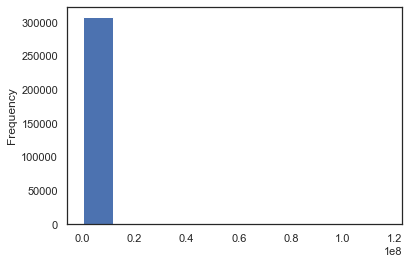

---------------------------------------------------------------------------------------------------- 
 AMT_CREDIT


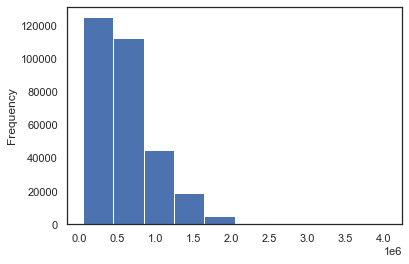

---------------------------------------------------------------------------------------------------- 
 AMT_ANNUITY


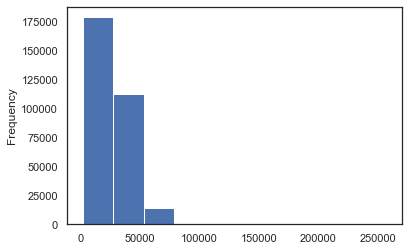

---------------------------------------------------------------------------------------------------- 
 REGION_POPULATION_RELATIVE


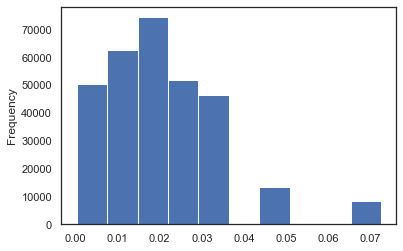

---------------------------------------------------------------------------------------------------- 
 DAYS_REGISTRATION


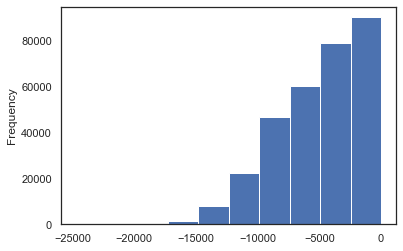

---------------------------------------------------------------------------------------------------- 
 CNT_FAM_MEMBERS


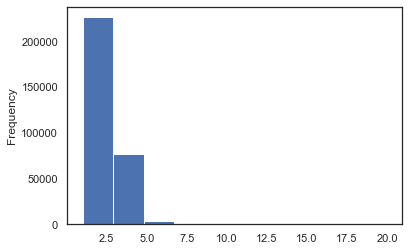

---------------------------------------------------------------------------------------------------- 
 EXT_SOURCE_2


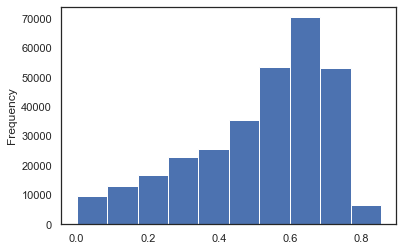

---------------------------------------------------------------------------------------------------- 
 OBS_60_CNT_SOCIAL_CIRCLE


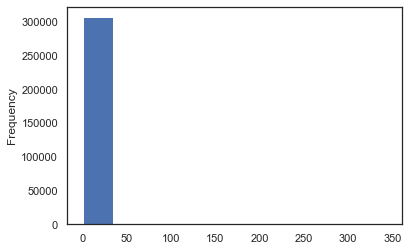

---------------------------------------------------------------------------------------------------- 
 DEF_60_CNT_SOCIAL_CIRCLE


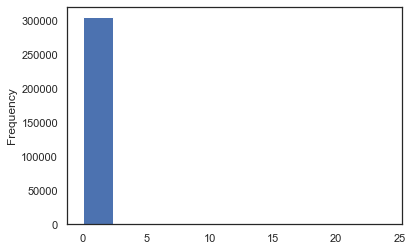

---------------------------------------------------------------------------------------------------- 
 DAYS_LAST_PHONE_CHANGE


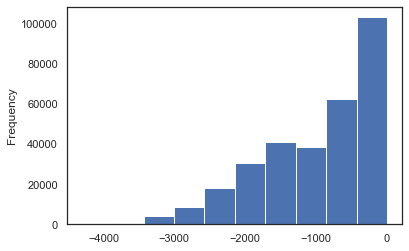

---------------------------------------------------------------------------------------------------- 
 EXT_SOURCE_1


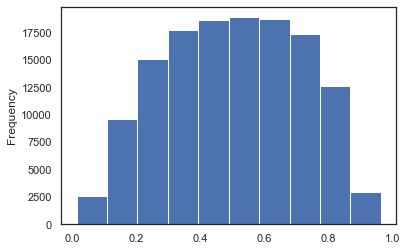

---------------------------------------------------------------------------------------------------- 
 EXT_SOURCE_3


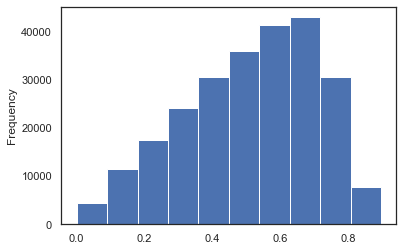

---------------------------------------------------------------------------------------------------- 
 CREDIT_INCOME_PERCENT


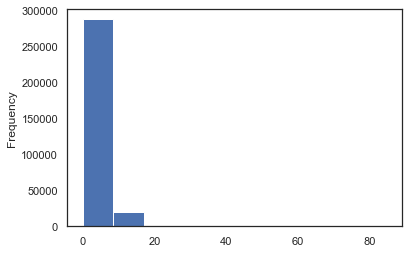

---------------------------------------------------------------------------------------------------- 
 ANNUITY_INCOME_PERCENT


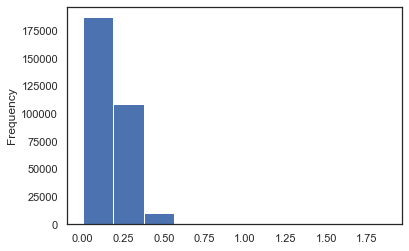

---------------------------------------------------------------------------------------------------- 
 CREDIT_TERM


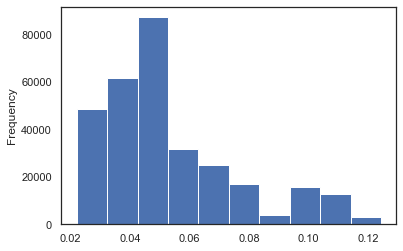

---------------------------------------------------------------------------------------------------- 
 DAYS_EMPLOYED_PERCENT


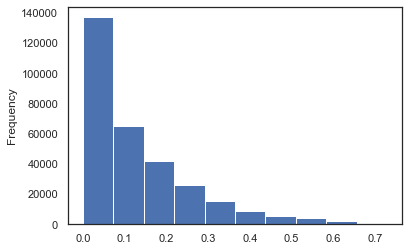

In [17]:
plot_fields = float_table_adjusted.columns.values.tolist()+ domain_fields
for i in plot_fields:
    print("-"*100, "\n",i)
    train[i].plot.hist()
    plt.show()

## 6.8 Fill Missing Values For 'EXT_SOURCE' fields

In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
def stratified_dataset(df,test_size,strat_field ='EXT_SOURCE_1'):
    """ Perform stratification and return test index"""
    
    df_work = df.dropna(subset=[strat_field]).copy()
    
    #create stratifying field
    df_work['STRAT_FIELD'] = df_work[strat_field].apply(lambda x: int( round((x*10))) )
    
    # split between target value 1 and 0
    non_defaults = df_work[df_work['TARGET']==0].copy().reset_index(drop=True)
    defaults = df_work[df_work['TARGET']==1].copy().reset_index(drop=True)
    
    X = non_defaults.drop(['STRAT_FIELD'], axis=1).values
    y = non_defaults['STRAT_FIELD'].values
    
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=54)
    splits = list(sss.split(X, y)) # return the index of the test and train sets
    
    new_df = non_defaults.iloc[splits[0][1]].copy() #take the test_size of non_defaults to balance with defaults
    new_df = new_df.append(defaults).reset_index(drop=True)
    
    return new_df

In [19]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
def predict_nan(predict,features, df):
    """ Predict the value of na for given feature"""
    #get X target for predict 
    temp_predict_df = df[df[predict].isna()]
    
    X_predict = temp_predict_df.dropna(subset=features).copy()
    
    X_predict_input = X_predict[features].values
    X_predict_ids = X_predict.index.values
    
    #lets filter only training dataset
    df_train = df[df.TARGET.isnull() == False]
    
    #let get prediction training set
    X_df = df_train.dropna(subset=[predict] + features).copy()
    X_df = stratified_dataset(X_df,0.09,strat_field =predict) #balance default and non_default dataset
    
    train_df = X_df
    X = train_df[features].values
    y = train_df[predict].values
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=54)
    
    model = LGBMRegressor(random_state = 54)
    model.fit(X_train, y_train ,eval_metric= 'r2',eval_set=[(X_test, y_test)], early_stopping_rounds=5, verbose=-1)
    pred = model.predict(X_test,num_iteration=model.best_iteration_)

    # calculate mse
    mse = mean_squared_error(y_test, pred)
    print("MSE: {:.4f}".format(mse)) 
    
     #update training values
    update_pred = model.predict(X_predict_input ,num_iteration=model.best_iteration_)
    pred_update = pd.DataFrame(update_pred.flatten(), columns=[predict], index=X_predict_ids)
    return pred_update
    

In [20]:
data = df.copy()

In [21]:
#let fill in the missing value for EXT_SOURCE fields by using ML predition model

#there are the prediction features
train_fets = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY'] 
train_fets += ['CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM','DAYS_EMPLOYED_PERCENT']

predict_fields = ['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3'] 
for f in predict_fields:
    print("Now predicting missing values for {}.".format(f))
    print("-"*50)
    pred_update = predict_nan(f,train_fets,df)
    pred_update = pred_update.reset_index()
    data = data.reset_index()
    data.update(pred_update)
    data = data.drop('index',axis = 1)
    data
    print("\n")

Now predicting missing values for EXT_SOURCE_1.
--------------------------------------------------
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's l2: 0.0369752
MSE: 0.0370


Now predicting missing values for EXT_SOURCE_2.
--------------------------------------------------
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's l2: 0.0417679
MSE: 0.0418


Now predicting missing values for EXT_SOURCE_3.
--------------------------------------------------
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's l2: 0.0393414
MSE: 0.0393




## 6.9 Create fillNa function
Lets create a fillNa function. A fillNa function is a helper function to fill any missing values.

In [22]:
def fillNa(features):
    nan_list = data[features].isna().sum()
    idx = nan_list.index
    counts = nan_list.values

    nan_features = []
    for i,v in zip(idx,counts):
        if v > 0 and i not in ['SK_ID_CURR','TARGET']:
            nan_features.append(i)
            
    #first create median value table
    train = data[data.TARGET.isnull() == False] # filter training sub-dataset
    describe_df =  train.describe().T

    #fill any missing values
    for feature in nan_features:
        data[feature].fillna(describe_df.at[feature,'50%'],inplace=True)
    return data

In [23]:
# create scaler ojbects with all fields we want fill na with median value
features =  ['SK_ID_CURR','TARGET'] + adjusted_float_list.tolist() + domain_fields
fillNa(features = features)

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
0               202500.0    406597.5      24700.5                    0.018801   
1               270000.0   1293502.5      35698.5                    0.003541   
2                67500.0    135000.0       6750.0                    0.010032   
3               135000.0    312682.5      29686.5                    0.008019   
4               121500.0    513000.0      21865.5                    0.028663   
...                  ...         ...          ...                         ...   
356250          121500.0    412560.0      17473.5                    0.002042   
356251          157500.0    622413.0      31909.5                    0.035792   
356252          202500.0    315000.0      33205.5                    0.026392   
356253          225000.0    450000.0      25128.0                    0.018850   
356254          135000.0    312768.0      24709.5                    0.006629   

        DAYS_REGISTRATION  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
0                 -3648.0              1.0      0.458496   
1                 -1186.0              2.0      0.427346   
2                 -4260.0              1.0      0.479428   
3                 -9833.0              2.0      0.483162   
4                 -4311.0              1.0      0.465227   
...                   ...              ...           ...   
356250            -9094.0              1.0      0.648575   
356251            -3015.0              4.0      0.684596   
356252            -2681.0              3.0      0.632770   
356253            -1461.0              2.0      0.445701   
356254            -1072.0              2.0      0.456541   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            1.0                       0.0   
2                            0.0                       0.0   
3                            2.0                       0.0   
4                            0.0                       0.0   
...                          ...                       ...   
356250                       1.0                       0.0   
356251                       2.0                       0.0   
356252                       0.0                       0.0   
356253                       0.0                       0.0   
356254                       0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  EXT_SOURCE_1  EXT_SOURCE_3  \
0                      -1134.0      0.378018      0.438680   
1                       -828.0      0.481033      0.567522   
2                       -815.0      0.477903      0.502131   
3                       -617.0      0.475684      0.470818   
4                      -1106.0      0.509719      0.476514   
...                        ...           ...           ...   
356250                  -684.0      0.480433      0.643026   
356251                     0.0      0.480433      0.499272   
356252                  -838.0      0.733503      0.283712   
356253                 -2308.0      0.373090      0.595456   
356254                  -327.0      0.480433      0.272134   

        CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  \
0                    2.007889                0.121978     0.060749   
1                    4.790750                0.132217     0.027598   
2                    2.000000                0.100000     0.050000   
3                    2.316167                0.219900     0.094941   
4                    4.222222                0.179963     0.042623   
...                       ...                     ...          ...   
356250               3.395556                0.143815     0.042354   
356251               3.951829                0.202600     0.051267   
356252               1.555556                0.163978     0.105414   
356253               2.000000                0.111680     0.055840   
356254               2.316800                0.183033 

### 6.9.1 Log Transform Fields
Apply log transformation to the following fields:
- AMT_INCOME_TOTAL
- AMT_CREDIT
- AMT_ANNUITY
- REGION_POPULATION_RELATIVE
- DAYS_EMPLOYED_PERCENT

In [24]:
log_fields = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_EMPLOYED_PERCENT']
for log_field in log_fields:
    data[log_field] = data[log_field].apply(lambda x: np.log(x+1))
fillNa(log_fields)

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  REGION_POPULATION_RELATIVE  \
0              12.218500   12.915581    10.114619                    0.018626   
1              12.506181   14.072865    10.482892                    0.003535   
2              11.119898   11.813037     8.817446                    0.009982   
3              11.813037   12.652947    10.298481                    0.007987   
4              11.707678   13.148033     9.992711                    0.028260   
...                  ...         ...          ...                         ...   
356250         11.707678   12.930139     9.768498                    0.002040   
356251         11.967187   13.341361    10.370690                    0.035166   
356252         12.218500   12.660331    10.410501                    0.026050   
356253         12.323860   13.017005    10.131778                    0.018675   
356254         11.813037   12.653220    10.114984                    0.006607   

        DAYS_REGISTRATION  CNT_FAM_MEMBERS  EXT_SOURCE_2  \
0                 -3648.0              1.0      0.458496   
1                 -1186.0              2.0      0.427346   
2                 -4260.0              1.0      0.479428   
3                 -9833.0              2.0      0.483162   
4                 -4311.0              1.0      0.465227   
...                   ...              ...           ...   
356250            -9094.0              1.0      0.648575   
356251            -3015.0              4.0      0.684596   
356252            -2681.0              3.0      0.632770   
356253            -1461.0              2.0      0.445701   
356254            -1072.0              2.0      0.456541   

        OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                            2.0                       2.0   
1                            1.0                       0.0   
2                            0.0                       0.0   
3                            2.0                       0.0   
4                            0.0                       0.0   
...                          ...                       ...   
356250                       1.0                       0.0   
356251                       2.0                       0.0   
356252                       0.0                       0.0   
356253                       0.0                       0.0   
356254                       0.0                       0.0   

        DAYS_LAST_PHONE_CHANGE  EXT_SOURCE_1  EXT_SOURCE_3  \
0                      -1134.0      0.378018      0.438680   
1                       -828.0      0.481033      0.567522   
2                       -815.0      0.477903      0.502131   
3                       -617.0      0.475684      0.470818   
4                      -1106.0      0.509719      0.476514   
...                        ...           ...           ...   
356250                  -684.0      0.480433      0.643026   
356251                     0.0      0.480433      0.499272   
356252                  -838.0      0.733503      0.283712   
356253                 -2308.0      0.373090      0.595456   
356254                  -327.0      0.480433      0.272134   

        CREDIT_INCOME_PERCENT  ANNUITY_INCOME_PERCENT  CREDIT_TERM  \
0                    2.007889                0.121978     0.060749   
1                    4.790750                0.132217     0.027598   
2                    2.000000                0.100000     0.050000   
3                    2.316167                0.219900     0.094941   
4                    4.222222                0.179963     0.042623   
...                       ...                     ...          ...   
356250               3.395556                0.143815     0.042354   
356251               3.951829                0.202600     0.051267   
356252               1.555556                0.163978     0.105414   
356253               2.000000                0.111680     0.055840   
356254               2.316800                0.183033 

---------------------------------------------------------------------------------------------------- 
 AMT_INCOME_TOTAL


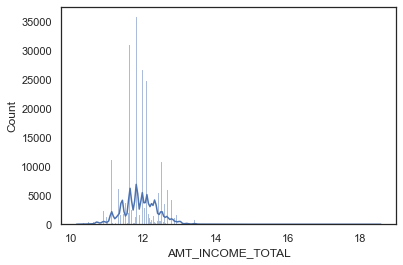

---------------------------------------------------------------------------------------------------- 
 AMT_CREDIT


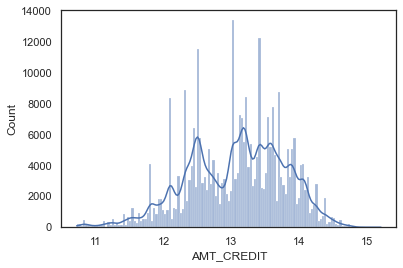

---------------------------------------------------------------------------------------------------- 
 AMT_ANNUITY


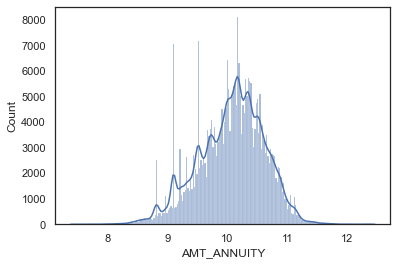

---------------------------------------------------------------------------------------------------- 
 REGION_POPULATION_RELATIVE


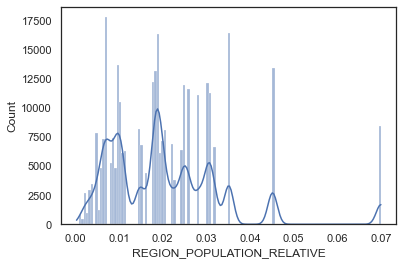

---------------------------------------------------------------------------------------------------- 
 DAYS_EMPLOYED_PERCENT


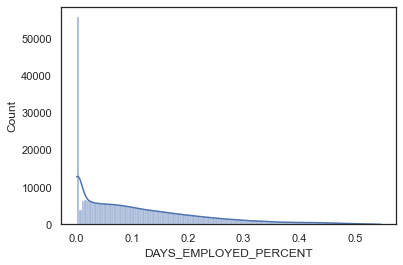

In [25]:
#plot after log transformations
train = data[data.TARGET.isnull() == False]
for log_field in log_fields:
    print('-'*100,"\n",log_field)
    sns.histplot(train[log_field],kde = True)
    plt.show()

In [26]:
train[log_fields].describe().T

count       mean       std        min  \
AMT_INCOME_TOTAL            307511.0  11.909245  0.488906  10.152338   
AMT_CREDIT                  307511.0  13.070108  0.715193  10.714440   
AMT_ANNUITY                 307511.0  10.067677  0.545872   7.388019   
REGION_POPULATION_RELATIVE  307511.0   0.020563  0.013418   0.000290   
DAYS_EMPLOYED_PERCENT       307511.0   0.114440  0.112048   0.000000   

                                  25%        50%        75%        max  
AMT_INCOME_TOTAL            11.630717  11.899215  12.218500  18.577685  
AMT_CREDIT                  12.506181  13.149068  13.603123  15.214228  
AMT_ANNUITY                  9.712630  10.122784  10.451522  12.460818  
REGION_POPULATION_RELATIVE   0.009956   0.018675   0.028260   0.070000  
DAYS_EMPLOYED_PERCENT        0.021329   0.084933   0.174794   0.547434

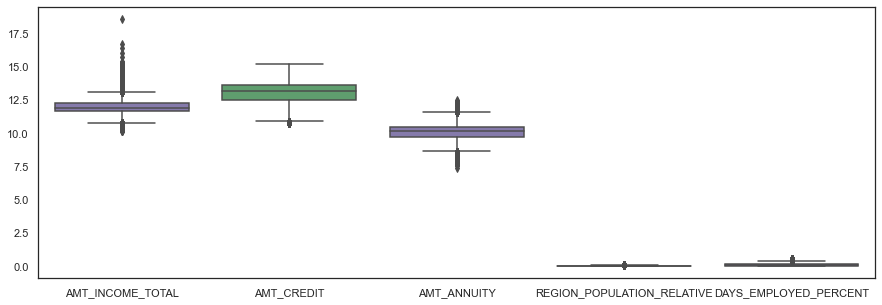

In [27]:
#boxplot to highlight any outliers
fig, ax = plt.subplots(figsize=(15,5))
sns.boxplot(palette=["m", "g"],data=train[log_fields])
plt.show()

In [28]:
from collections import Counter
def get_outlier_ids_tukey(data,feature,step_size = 1.7):
    """ Get the index ids for the outlier row 
    using tukey's method.
        Params
    ------
    data: DataFrame
    
    features: list
            The fields we want to get apply tukey's method too.
"""
    counter = Counter()

    #filter out missing values
    df = data[data[feature].notna()][feature]

    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(df, 25)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(df, 75)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*step_size

    min_val = Q1 - step
    max_val = Q3 + step
    print("{}: Min {:.4f}, Max {:.4f}".format(feature,min_val ,max_val))
    ids = ~((df >= min_val) & (df <= max_val))
    counter.update(df[ids].index.values.tolist())

    return list(counter.keys())


In [29]:
for i in ['AMT_INCOME_TOTAL','REGION_POPULATION_RELATIVE']:
    #we only want to remove outliers from training dataset
    outlier_ids = get_outlier_ids_tukey(train,i)
    #create new DataFrame that has outliers removed.
    data = data.drop(outlier_ids).copy().reset_index(drop=True)

AMT_INCOME_TOTAL: Min 10.6315, Max 13.2177
REGION_POPULATION_RELATIVE: Min -0.0212, Max 0.0594


---------------------------------------------------------------------------------------------------- 
 AMT_INCOME_TOTAL


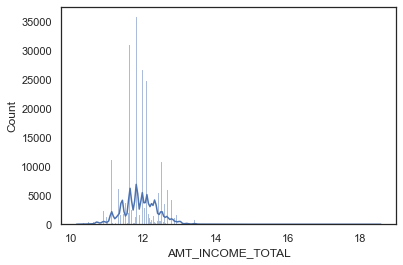

---------------------------------------------------------------------------------------------------- 
 AMT_CREDIT


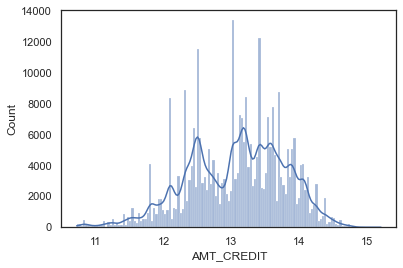

---------------------------------------------------------------------------------------------------- 
 AMT_ANNUITY


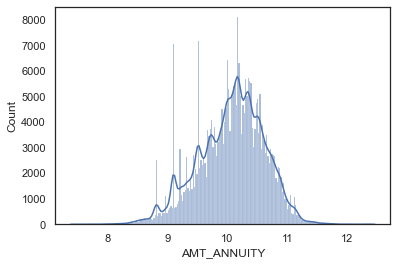

---------------------------------------------------------------------------------------------------- 
 REGION_POPULATION_RELATIVE


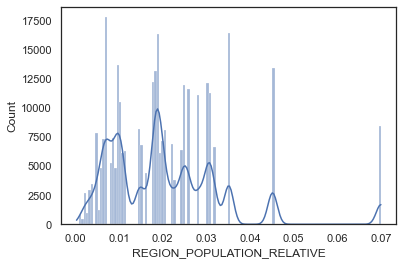

---------------------------------------------------------------------------------------------------- 
 DAYS_EMPLOYED_PERCENT


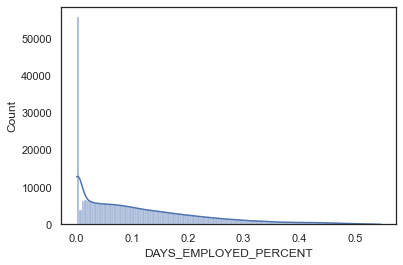

In [30]:
#plot after removing outliers
for log_field in log_fields:
    print('-'*100,"\n",log_field)
    sns.histplot(train[log_field],kde = True)
    plt.show()

### 6.9.2 Transform Field Using Boxcox
Apply boxcox transformations to the following fields:
- DAYS_REGISTRATION
- CREDIT_INCOME_PERCENT
- ANNUITY_INCOME_PERCENT
- CREDIT_TERM

The fields DAYS_REGISTRATIONis negative because its represent a date prior to the application date. In order to use boxcox all values must be positive. Since all the values for this field are negative its safe for us to convert it to positive without comprosing data integrity.

In [31]:
#before we apply boxcox we need to make values are positive.
data['DAYS_REGISTRATION'] = data['DAYS_REGISTRATION'].apply(lambda x: abs(x) + 0.01)
train = data[data.TARGET.isna() == False]
test = data[data.TARGET.isna() == True]

In [32]:
 from scipy import stats
 def boxcox(features:list):
    """ Perform boxcox transformations on given features. 
        Params
        ------
        features:     list
                        The fields we want to perform
                        boxcox transformation on.
    """
    
    for feature in features:
        #first perform box on training dataset
        #get ids of training datasets
        ids = train[train[feature].notna()].index.values
        
        #perform boxcox
        vals = train[train[feature].notna()][feature].values
        x = stats.boxcox(vals) # x[0] is the value after tranformation, x[1] is lambda

        #update training values
        X_update = pd.DataFrame(x[0], columns=[feature], index=ids)
        data.update(X_update)

        #now update test set using lmbda from training set
        ids_test = test[test[feature].notna()].index.values
        vals_test = test[test[feature].notna()][feature].values
        x_test = stats.boxcox(vals_test,lmbda=x[1])

        #update training values
        X_update_test = pd.DataFrame(x_test, columns=[feature], index=ids_test)
        data.update(X_update_test)
        print("Boxcox complete for {}".format(feature))

In [33]:
boxcox_fields = ['DAYS_REGISTRATION','CREDIT_INCOME_PERCENT','ANNUITY_INCOME_PERCENT','CREDIT_TERM']
boxcox(boxcox_fields)

Boxcox complete for DAYS_REGISTRATION
Boxcox complete for CREDIT_INCOME_PERCENT
Boxcox complete for ANNUITY_INCOME_PERCENT
Boxcox complete for CREDIT_TERM


In [34]:
train = data[data.TARGET.isna() == False]
test = data[data.TARGET.isna() == True]

---------------------------------------------------------------------------------------------------- 
 DAYS_REGISTRATION


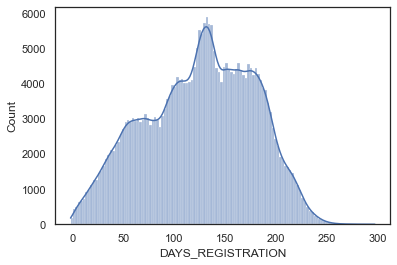

---------------------------------------------------------------------------------------------------- 
 CREDIT_INCOME_PERCENT


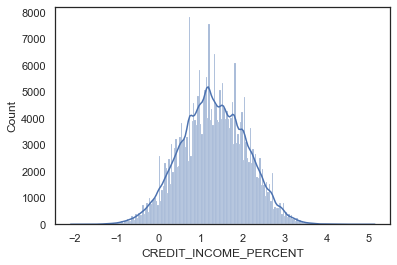

---------------------------------------------------------------------------------------------------- 
 ANNUITY_INCOME_PERCENT


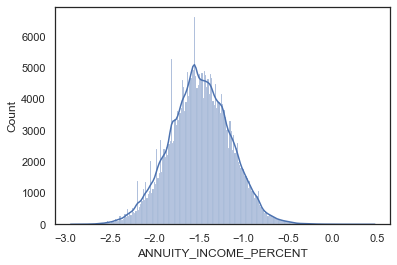

---------------------------------------------------------------------------------------------------- 
 CREDIT_TERM


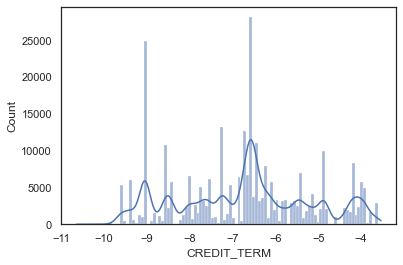

In [35]:
#plot after removing outliers
for boxcox_field in boxcox_fields:
    print('-'*100,"\n",boxcox_field)
    sns.histplot(train[boxcox_field],kde = True)
    plt.show()

### 6.9.3 Categorical Fields
The following three fields are int values and are best used as categorical. We just need to set a maximum value to reduce the number of categories.
- CNT_FAM_MEMBERS
- OBS_60_CNT_SOCIAL_CIRCLE
- DEF_60_CNT_SOCIAL_CIRCLE

In [36]:
#reduce the number of categories 
def obs_60_cnt(x):
    if x <= 5:
        return x
    else:
        return 6
    
data['OBS_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'].apply(obs_60_cnt)

In [37]:
train = data[data.TARGET.isna() == False]
test = data[data.TARGET.isna() == True]

<AxesSubplot:>

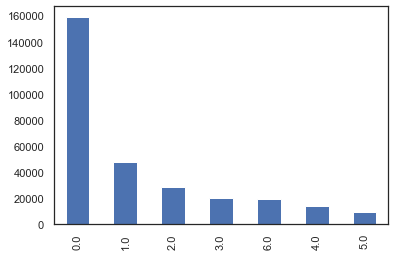

In [38]:
train['OBS_60_CNT_SOCIAL_CIRCLE'].value_counts().plot.bar()

In [39]:
def applyMax(feature,df):
        """ Lets set a ceiling value.
        """ 
        column = df[feature].value_counts(normalize=True).reset_index() 
        df[feature] = np.clip(df[feature], 0, column[column[feature]>0.01]['index'].max()) #setting ceiling value

In [40]:
int_fields = ['CNT_FAM_MEMBERS', 'DEF_60_CNT_SOCIAL_CIRCLE']
for i in int_fields:
    applyMax(i, data)

In [41]:
train = data[data.TARGET.isna() == False]
test = data[data.TARGET.isna() == True]

CNT_FAM_MEMBERS


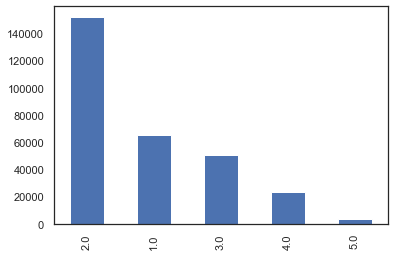

DEF_60_CNT_SOCIAL_CIRCLE


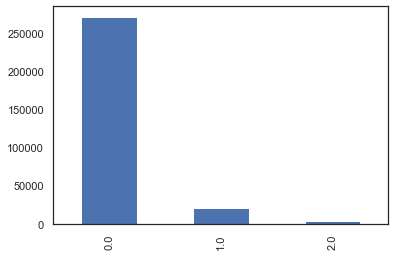

In [42]:
for i in int_fields:
    print(i)
    train[i].value_counts().plot.bar()
    plt.show()

In [43]:
data.describe().T

count           mean            std  \
AMT_INCOME_TOTAL            344610.0      11.915394       0.466059   
AMT_CREDIT                  344610.0      13.048363       0.713158   
AMT_ANNUITY                 344610.0      10.077843       0.544226   
REGION_POPULATION_RELATIVE  344610.0       0.020551       0.013417   
DAYS_REGISTRATION           344610.0     125.144170      53.083633   
CNT_FAM_MEMBERS             344610.0       2.148342       0.895049   
EXT_SOURCE_2                344610.0       0.514657       0.189271   
OBS_60_CNT_SOCIAL_CIRCLE    344610.0       1.270468       1.823923   
DEF_60_CNT_SOCIAL_CIRCLE    344610.0       0.096828       0.336423   
DAYS_LAST_PHONE_CHANGE      344610.0    -979.376130     834.960974   
EXT_SOURCE_1                344610.0       0.495584       0.126789   
EXT_SOURCE_3                344610.0       0.499799       0.159399   
CREDIT_INCOME_PERCENT       344610.0       1.261085       0.780659   
ANNUITY_INCOME_PERCENT      344610.0      -1.492042       0.344608   
CREDIT_TERM                 344610.0      -6.611633       1.567060   
DAYS_EMPLOYED_PERCENT       344610.0       0.115012       0.112126   
SK_ID_CURR                  344610.0  278202.508441  102825.686261   
TARGET                      295966.0       0.081036       0.272891   

                                     min            25%            50%  \
AMT_INCOME_TOTAL            1.020146e+01      11.630717      11.938200   
AMT_CREDIT                  1.071444e+01      12.506181      13.122787   
AMT_ANNUITY                 7.591357e+00       9.728837      10.129806   
REGION_POPULATION_RELATIVE  2.529680e-04       0.009956       0.018675   
DAYS_REGISTRATION          -1.809726e+00      85.572787     129.137212   
CNT_FAM_MEMBERS             1.000000e+00       2.000000       2.000000   
EXT_SOURCE_2                8.173617e-08       0.395674       0.564457   
OBS_60_CNT_SOCIAL_CIRCLE    0.000000e+00       0.000000       0.000000   
DEF_60_CNT_SOCIAL_CIRCLE    0.000000e+00       0.000000       0.000000   
DAYS_LAST_PHONE_CHANGE     -4.361000e+03   -1593.000000    -772.000000   
EXT_SOURCE_1                1.345791e-02       0.428464       0.480433   
EXT_SOURCE_3                5.272652e-04       0.418854       0.499272   
CREDIT_INCOME_PERCENT      -2.107417e+00       0.726990       1.245823   
ANNUITY_INCOME_PERCENT     -3.086746e+00      -1.718439      -1.494496   
CREDIT_TERM                -1.064494e+01      -7.756227      -6.569516   
DAYS_EMPLOYED_PERCENT       0.000000e+00       0.021614       0.085821   
SK_ID_CURR                  1.000010e+05  189147.250000  278231.500000   
TARGET                      0.000000e+00       0.000000       0.000000   

                                      75%            max  
AMT_INCOME_TOTAL                12.218500      15.299385  
AMT_CREDIT                      13.582318      15.214228  
AMT_ANNUITY                     10.460586      12.323860  
REGION_POPULATION_RELATIVE       0.028260       0.070000  
DAYS_REGISTRATION              166.657357     297.272140  
CNT_FAM_MEMBERS                  3.000000       5.000000  
EXT_SOURCE_2                     0.662244       0.855000  
OBS_60_CNT_SOCIAL_CIRCLE         2.000000       6.000000  
DEF_60_CNT_SOCIAL_CIRCLE         0.000000       2.000000  
DAYS_LAST_PHONE_CHANGE        -287.000000       0.000000  
EXT_SOURCE_1                     0.558215       0.962693  
EXT_SOURCE_3                     0.598926       0.893976  
CREDIT_INCOME_PERCENT            1.799871       5.143301  
ANNUITY_INCOME_PERCENT          -1.259619       0.763055  
CREDIT_TERM                     -5.447280      -3.538433  
DAYS_EMPLOYED_PERCENT            0.175879       0.547434  
SK_ID_CURR                  367254.750000  456255.000000  
TARGET                           0.000000       1.000000

## 6.10 Save Final Features To File

In [44]:
#save pre-processed file to csv
data.to_csv(r'C:\Users\Duong Nguyen\Desktop\final_project\home-credit-default-risk\results\1_6_applications_continuous.csv',index=False)